In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib import cm

In [82]:
# функция Розенброка
def Rosenbrock(args):
    _sum = 0
    for i in range(len(args) - 1):
        _sum += (1 - args[i])**2 + 100*((args[i+1] - args[i]**2)**2)
    return _sum

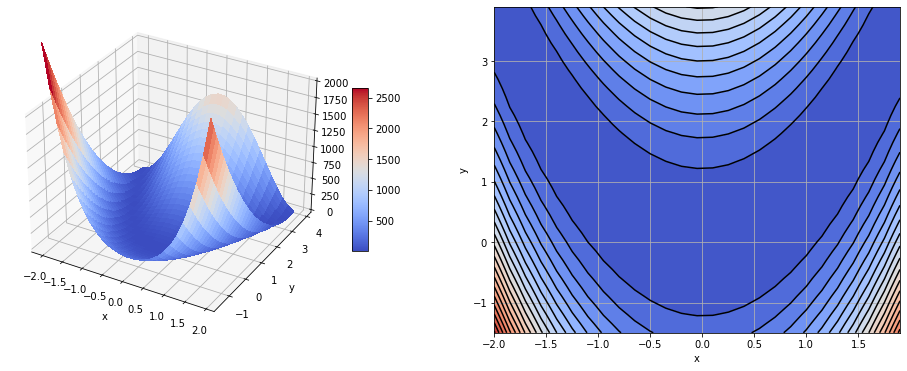

In [83]:
# изобразим функцию с 2 параметрами
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(-2, 2, 0.15)
Y = np.arange(-1.5, 4, 0.15)
X, Y = np.meshgrid(X, Y)
Z = Rosenbrock([X,Y])

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
ax.set_zlim(0, 2000)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel("x")
ax.set_ylabel("y")


ax = fig.add_subplot(1, 2, 2)
ax.contourf(X, Y, Z, 20, cmap=cm.coolwarm)
ax.contour(X, Y, Z, 20, colors = "black")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

In [220]:
# итератор - увеличивает множитель c_i(gamma_i) и возвращает функцию с ним
class penalty_func:
    def __init__(self, f, G, H, q):
        self.f = f
        self.q = q
        self.curr_gamma = 1
        def s_g(x):
            _sum = f(x)
            for g in G:
                t = g(x)
                try:
                    t[t < 0] = 0
                except:
                    t = max(0, t)
                _sum += self.curr_gamma * ((t ** 2))
            for h in H:
                _sum += self.curr_gamma * h(x) ** 2  
            return _sum
        self.S_gamma = s_g
#         self.S_gamma = lambda x: f(x) + self.curr_gamma * sum([max(0, g(x)) ** 2 for g in G]) + self.curr_gamma + sum([h(x) ** 2 for h in H])
        
    def __iter__(self):
        while True:
            yield self.S_gamma
            self.curr_gamma = self.curr_gamma * self.q
            f = self.f
            def s_g(x):
                _sum = f(x)
                for g in G:
                    t = g(x)
                    try:
                        t[t < 0] = 0
                    except:
                        t = max(0, t)
                    _sum += self.curr_gamma * ((t ** 2))
                for h in H:
                    _sum += self.curr_gamma * h(x) ** 2  
                return _sum
            self.S_gamma = s_g
#         self.S_gamma = lambda x: f(x) + self.curr_gamma * sum([max(0, g(x)) ** 2 for g in G]) + self.curr_gamma + sum([h(x) ** 2 for h in H])

# отрисовка графиков
def plot_graphs(f, S, point, iteration, max_z):
    fig = plt.figure(figsize=(16,5))
    fig.suptitle('iteration=%s' % str(iteration), fontsize=16)
    X = np.arange(-2, 2, 0.15)
    Y = np.arange(-1.5, 4, 0.15)
    X, Y = np.meshgrid(X, Y)
    
    # график функции
    Z = f([X,Y])
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(X, Y, Z, 20, cmap=cm.coolwarm)
    ax.contour(X, Y, Z, 20, colors = "black")
    ax.scatter(point[0], point[1], color="red")
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    # график функции со штрафом
    Z = S([X,Y])
    Z[Z > max_z] = max_z
    ax = fig.add_subplot(1, 2, 2)
    sp = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
#     ax.contour(X, Y, Z, 30, colors = "black")
    ax.scatter(point[0], point[1], color="red")
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")    
    fig.colorbar(sp)
    
    plt.show()
    

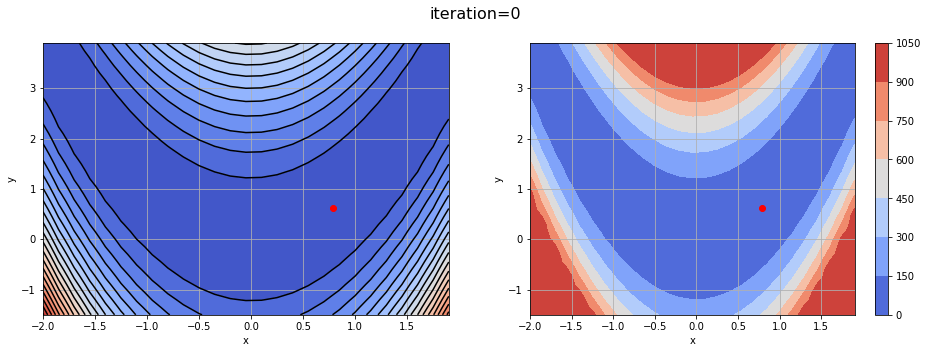

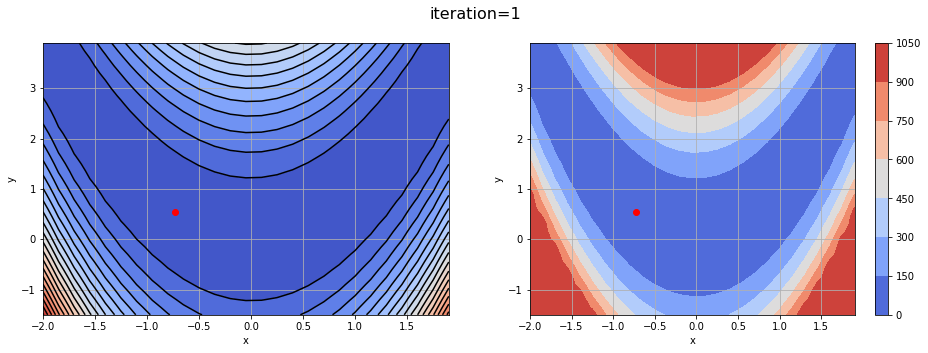

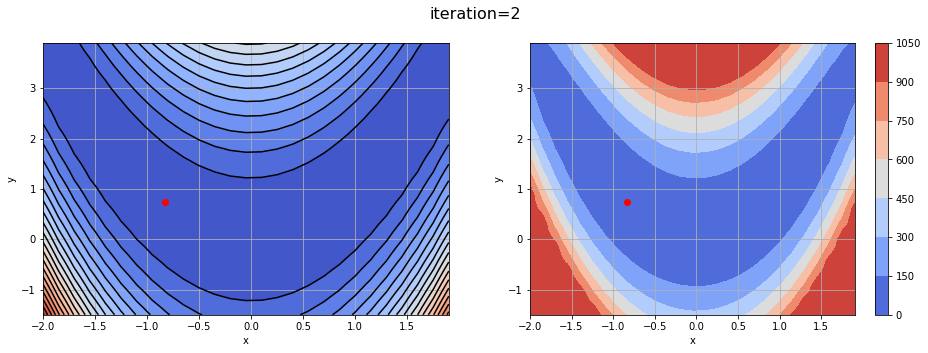

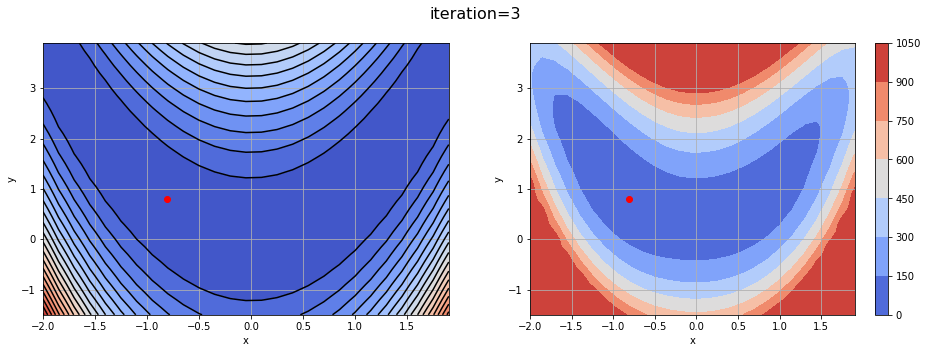

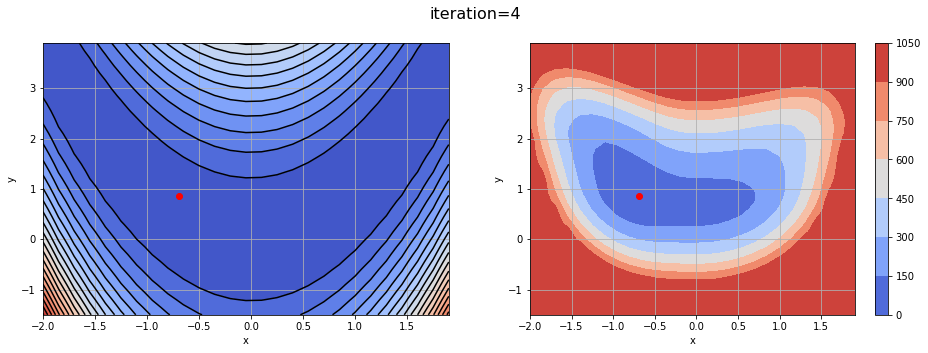

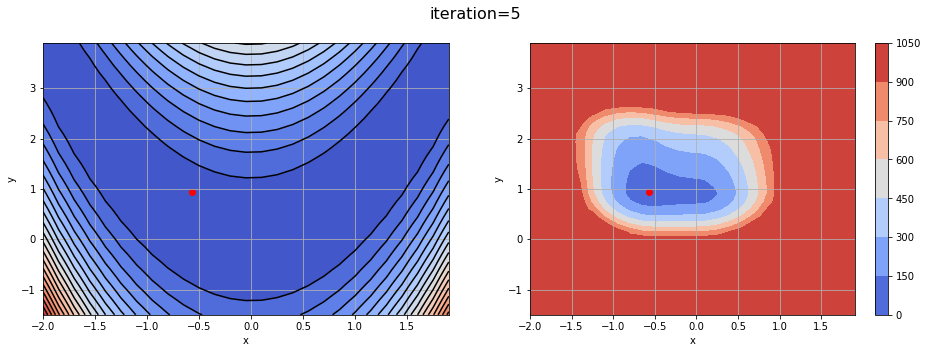

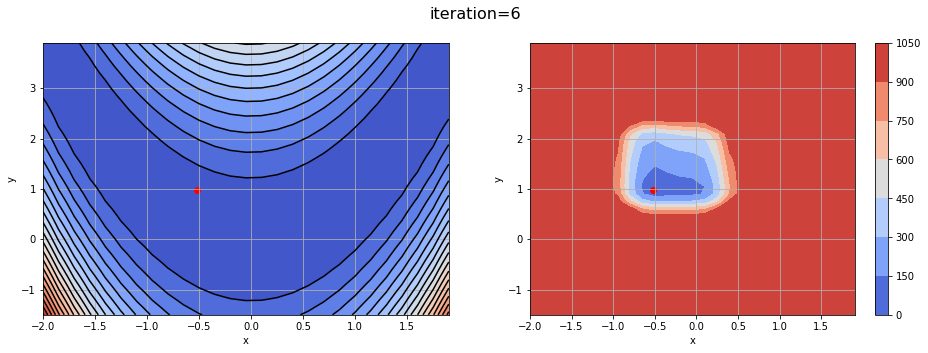

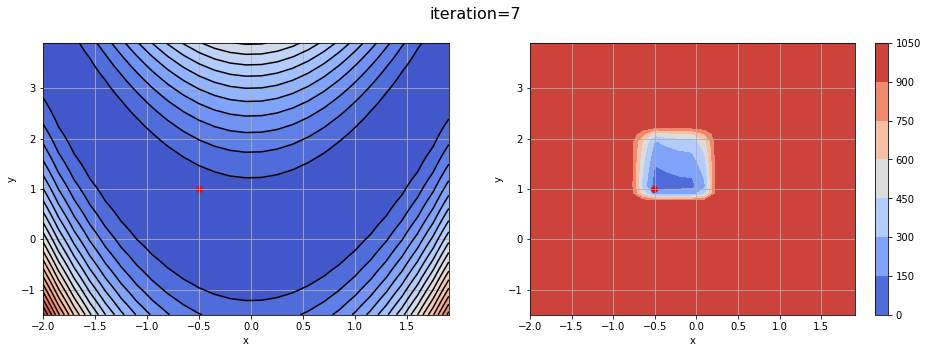

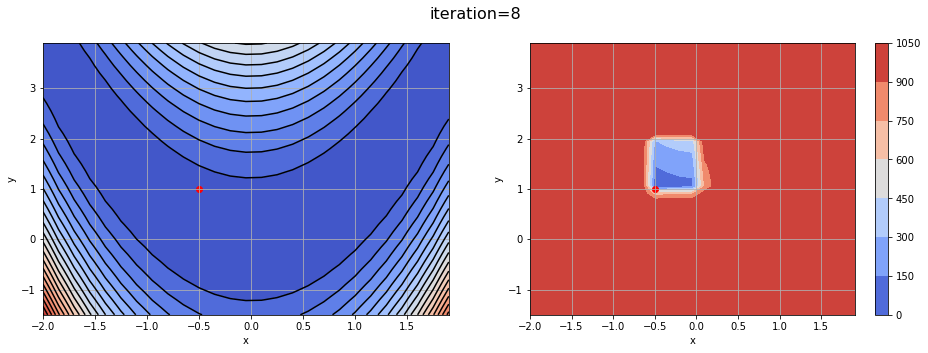

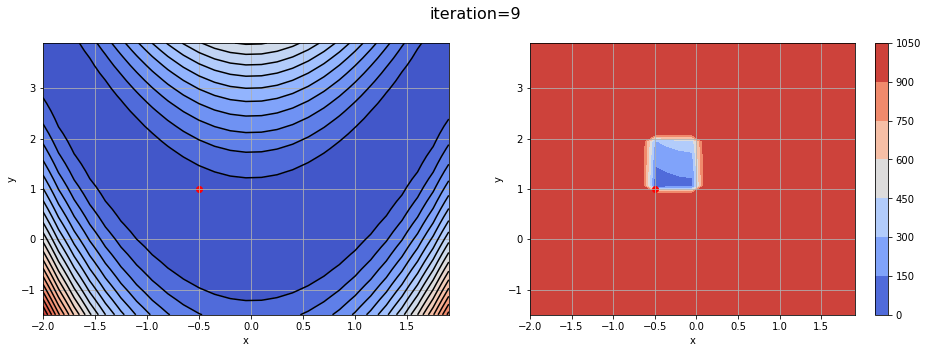

In [226]:
# ограничения
# G = [
#     lambda x:  x[0] + 1,
#     lambda x:  -2 - x[0],
#     lambda x:  x[1] - 2,
#     lambda x:  4 - x[1]  , 
# ]

G = [
    lambda x:  x[0] - 0,
    lambda x:  -0.5 - x[0],
    lambda x:  x[1] - 2,
    lambda x:  1 - x[1]  , 
]

H = [
    
]

it = penalty_func(Rosenbrock, G, H, 4)
gen = iter(it)

# движение точки безусловной оптимизации
for i in range(10):
    S = next(gen)
    #безусловная оптимизация
    min_point = opt.minimize(S, [-0.25, 1.5])
    plot_graphs(Rosenbrock, S, min_point.x, i, 1000)

In [227]:
# Сравним полученное значение со значением из пакета
print("Полученое значение - ", min_point.x)
# G = [
#     lambda x:  x[0] + 1,
#     lambda x:  -2 - x[0],
#     lambda x:  x[1] - 2,
#     lambda x:  4 - x[1]  , 
# ]

G = [
    lambda x:  x[0] - 0,
    lambda x:  -0.5 - x[0],
    lambda x:  x[1] - 2,
    lambda x:  1 - x[1]  , 
]

# cons = ({'type': 'ineq', 'fun': lambda x:  x[0] + 1},
#         {'type': 'ineq', 'fun': lambda x:  -2 - x[0]},
#         {'type': 'ineq', 'fun': lambda x:  x[1] - 2},
#         {'type': 'ineq', 'fun': lambda x:  4 - x[1]}
#        )

cons = ({'type': 'ineq', 'fun': lambda x:  -x[0] + 0},
        {'type': 'ineq', 'fun': lambda x:  0.5 + x[0]},
        {'type': 'ineq', 'fun': lambda x:  -x[1] + 2},
        {'type': 'ineq', 'fun': lambda x:  -1 + x[1]}
       )
res = opt.minimize(Rosenbrock, (-1.5, 3), constraints=cons)
print("opt.minimize      - ", res.x)

Полученое значение -  [-0.50028033  0.99971411]
opt.minimize      -  [-0.5  1. ]


In [232]:
G = [
    lambda x:  x[0] - 0,
    lambda x:  -0.5 - x[0],
    lambda x:  x[1] - 2,
    lambda x:  1 - x[1],
    lambda x:  (1 - x[2])**2,
    lambda x:  x[2]*2 - 2,
]

it = penalty_func(Rosenbrock, G, H, 4)
gen = iter(it)

# движение точки безусловной оптимизации
for i in range(10):
    S = next(gen)
    #безусловная оптимизация
    min_point = opt.minimize(S, [-0.25, 1.5, 0])
res = opt.minimize(Rosenbrock, [-0.25, 1.5, 0], constraints=cons)
print("Полученое значение - ", min_point.x)
print("opt.minimize      - ", res.x)

Полученое значение -  [-0.50028033  0.99971411  0.99942907]
opt.minimize      -  [-0.5         1.          0.99999999]
